In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [5]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 1/'
path_asphalt = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/txt/mass_spec/'
path_TinaTin = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/TinaTin MS'
ACSM_keys = ['10-12-2024', '11-12-2024', '12-12-2024', '13-12-2024']
MS_keys = ['10-12-2024_full', '11-12-2024_before-peak', '11-12-2024_peak', '11-12-2024_full', '12-12-2024_peak', '12-12-2024_full', '13-12-2024_full']
MS_asphalt_keys = ['Vesterbrogade_12062023_MS_TraficBefore', 'Vesterbrogade_12062023_MS_TraficAfter',
                   'Vesterbrogade_13062023_MS_TraficBefore', 'Vesterbrogade_13062023_MS_TraficAfter']
MS_TinaTin_keys = ['7-3-2022_full', '8-3-2022_full', '9-3-2022_full', '10-3-2022_full', '11-3-2022_full', '12-3-2022_full', '13-3-2022_full', '14-3-2022_full']

ACSM = read_csv(f'{path}Timeseries/', parent_path, 't_base', None, 1)
ACSM_temp = read_csv(f'{path}ACSM temp/', parent_path, 'Time', None, 1)
MS = read_txt(f'{path}MS/', parent_path, MS_keys, '\t', None)
MS_asphalt = read_txt(path_asphalt, parent_path, MS_asphalt_keys, '\t', None)
MS_TinaTin = read_txt(path_TinaTin, parent_path, MS_TinaTin_keys, '\t', None)

for key in MS.keys():
    MS[key].columns = ['m/z', 'org']

for key in MS_asphalt.keys():
    MS_asphalt[key].columns = ['m/z', 'org']

for key in MS_TinaTin.keys():
    MS_TinaTin[key].columns = ['m/z', 'org']

ACSM_temp['KBHH_temp_org']['Date'] = ACSM_temp['KBHH_temp_org']['Time'].dt.date
for date in ACSM_temp['KBHH_temp_org']['Date'].unique():
    mask = ACSM_temp['KBHH_temp_org']['Date'] == date
    new_df = ACSM_temp['KBHH_temp_org'][mask].reset_index()
    ACSM_temp[str(date)] = new_df

In [7]:
print(ACSM_temp['2024-12-10'].keys())

Index(['index', 'Time', 'Vaporizer Temp', 'ABCorr', 'Heaterbais', 'Org',
       'Date'],
      dtype='object')


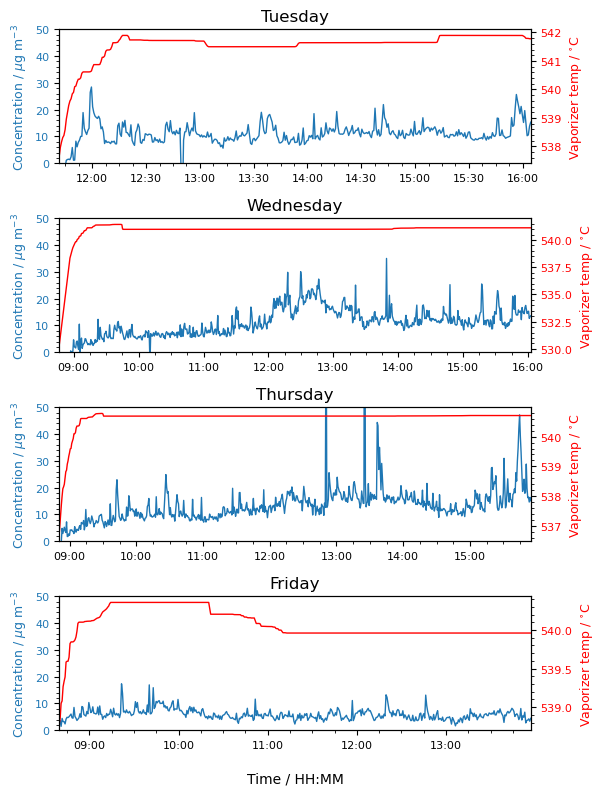

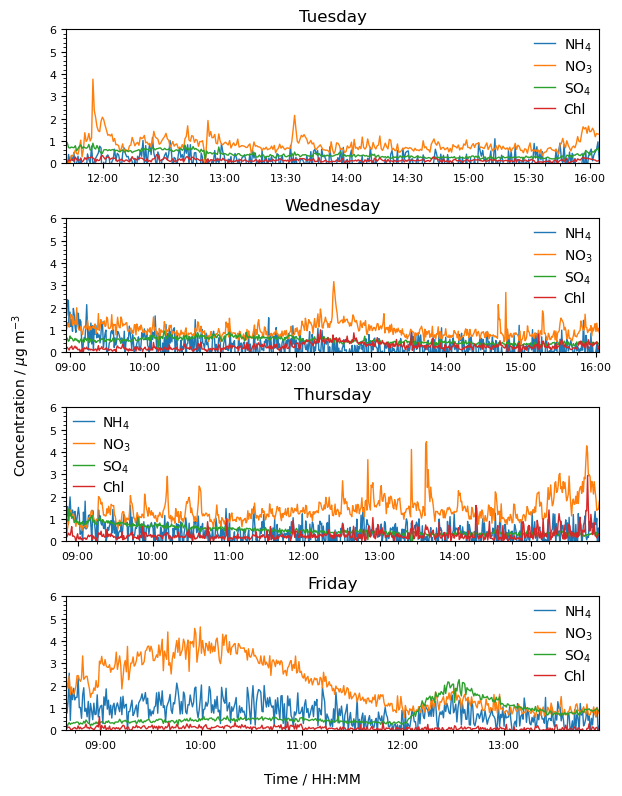

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 630x800 with 5 Axes>

In [ ]:
titles = ['Tuesday', 'Wednesday', 'Thursday', 'Friday']
temp_keys = [str(date) for date in ACSM_temp['KBHH_temp_org']['Date'].unique()]

fig1, axes1 = plt.subplots(4, 1, figsize = (6.3, 8))

plot_Conc(axes1, fig1, ACSM, ACSM_keys, 'Org', None)

for i, ax in enumerate(axes1):
    ax.set(ylim = (0, 50), title = titles[i])
    ax.set_ylabel('Concentration / $\mu$g m$^{-3}$', color = 'tab:blue')
    ax.tick_params(axis = 'y', labelcolor='tab:blue')
    # Vaporizer temperature
    ax2 = ax.twinx()
    ax2.plot(ACSM_temp[temp_keys[i]]['Time'], ACSM_temp[temp_keys[i]]['Vaporizer Temp'], color = 'r', lw = 1)
    ax2.tick_params(axis = 'y', labelcolor='r')
    ax2.set_ylabel('Vaporizer temp / $^{\circ}$C', color = 'r')
    # # Air beam correction factor
    # ax3 = ax.twinx()
    # ax3.spines.right.set_position(("axes", 1.2)) # Offset the right spine og ax3
    # ax3.plot(ACSM_temp[temp_keys[i]]['Time'], ACSM_temp[temp_keys[i]]['ABCorr'], color = 'g', lw = 1)
    # ax3.tick_params(axis = 'y', labelcolor='g')
    # ax3.set_ylabel('AB correction', color = 'g')

fig1.tight_layout()
fig1.savefig('ACSM/full_timeseries_org+temp.png', dpi = 600)
plt.show()

fig2, axes2 = plt.subplots(4, 1, figsize = (6.3, 8))

plot_Conc(axes2, fig2, ACSM, ACSM_keys, 'NH4', 'Concentration / $\mu$g m$^{-3}$')
plot_Conc(axes2, fig2, ACSM, ACSM_keys, 'NO3', 'Concentration / $\mu$g m$^{-3}$')
plot_Conc(axes2, fig2, ACSM, ACSM_keys, 'SO4', 'Concentration / $\mu$g m$^{-3}$')
plot_Conc(axes2, fig2, ACSM, ACSM_keys, 'Chl', 'Concentration / $\mu$g m$^{-3}$')

for ax, ttl in zip(axes2, titles):
    ax.legend(labels = ['NH$_{4}$', 'NO$_{3}$', 'SO$_{4}$', 'Chl'])
    ax.set(title = ttl, ylim = (0, 6))

fig2.tight_layout()
fig2.savefig('ACSM/full_timeseries_other.png', dpi = 600)
plt.show()

fig3, axes3 = plt.subplots(4, 1, figsize = (6.3, 8))

plot_Conc(axes3, fig3, ACSM, ACSM_keys, 'Org', 'Concentration / $\mu$g m$^{-3}$')

for ax, ttl in zip(axes3, titles):
    ax.set(ylim = (0, 50), title = ttl)

artist, inset_ax = plot_inset(axes3[2], 0.4, 2, (0.05, 0, 0.99, 1), '40%', ACSM['12-12-2024']['Time'], ACSM['12-12-2024']['Org'], None, False, True, ['2024-12-12 12:45:00', '2024-12-12 13:45:00'])

fig3.tight_layout()
fig3.savefig('ACSM/full_timeseries_org.png', dpi = 600)
plt.show()

In [4]:
fig, axes = plt.subplots(3, 1, figsize = (6.3, 6))

plot_MS_wInset([axes[0]], MS, ['12-12-2024_full'], 'org', 0.5, 1, (0, -0.09, 0.99, 1), [0.4, 0.3], ['Copenhagen Central Station'])
plot_MS_wInset([axes[1]], MS_TinaTin, ['8-3-2022_full'], 'org', 0.5, 1, (0, -0.09, 0.99, 1), [0.4, 0.3], ['Train maintenance facility'])
plot_MS_wInset([axes[2]], MS_asphalt, ['Vesterbrogade_13062023_MS_TraficBefore'], 'org', 0.5, 1, (0, -0.09, 0.99, 1), [0.4, 0.3], ['Urban Copenhagen street'])

sublabels = ['a', 'b', 'c']
for ax, l in zip(axes, sublabels):
    ax.text(0.02, 0.85, l, transform = ax.transAxes, fontsize = 9)

fig.tight_layout()
fig.savefig('ACSM/MS_combined.png', dpi = 600)

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 630x600 with 6 Axes>

In [5]:
titles = ['Tuesday', 'Wednesday', 'Friday']

fig, axes = plt.subplots(3, 1, figsize = (6.3, 6))

plot_MS_wInset(axes, MS, ['10-12-2024_full', '11-12-2024_full', '13-12-2024_full'], 'org', 0.5, 1, (0, -0.09, 0.99, 1), [0.4, 0.3], titles)

fig.tight_layout()
fig.savefig('ACSM/full_MS_org.pdf', dpi = 600)
plt.show()

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 630x600 with 6 Axes>

In [6]:
titles = ['Day 1 traffic before', 'Day 1 traffic after', 'Day 2 traffic after']
keys = ['Vesterbrogade_12062023_MS_TraficBefore', 'Vesterbrogade_12062023_MS_TraficAfter', 'Vesterbrogade_13062023_MS_TraficAfter']

fig, ax = plt.subplots(3, 1, figsize = (6.3, 6))

plot_MS_wInset(ax, MS_asphalt, keys, 'org', 0.5, 1, (0, -0.09, 0.99, 1), [0.4, 0.3], titles)

fig.tight_layout()
fig.savefig('ACSM/Trafic_MS_org.png', dpi = 600)
plt.show()

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 630x600 with 6 Axes>

In [7]:
fig, axes = plt.subplots(5, 1, figsize = (6.3, 10))

plot_MS_wInset(axes, MS_TinaTin, MS_TinaTin_keys[2:7], 'org', 0.5, 1, (0, -0.09, 0.99, 1), [0.4, 0.3], MS_TinaTin_keys[2:7])

for i, ax in enumerate(axes):
    date = MS_TinaTin_keys[i+2].split('_')[0]
    ax.set_title('Train maintenance facility ' + date)

fig.tight_layout()
fig.savefig('ACSM/PrepCenter1_MS_org.pdf', dpi = 600)
plt.show()

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 630x1000 with 10 Axes>